# Check Results of Quant Model

## 1. Download data and calculate trading signals 
-> check `get_signals.py` for more details. 

In [1]:
import get_signals
spot_px = get_signals.get_time_series(force_update=True)
signal, ma = get_signals.get_signals_from_MA1(spot_px, ma_1_window_size=500, long_only=False)

## 2.  Chart Time Series and Signal

### Long and Short

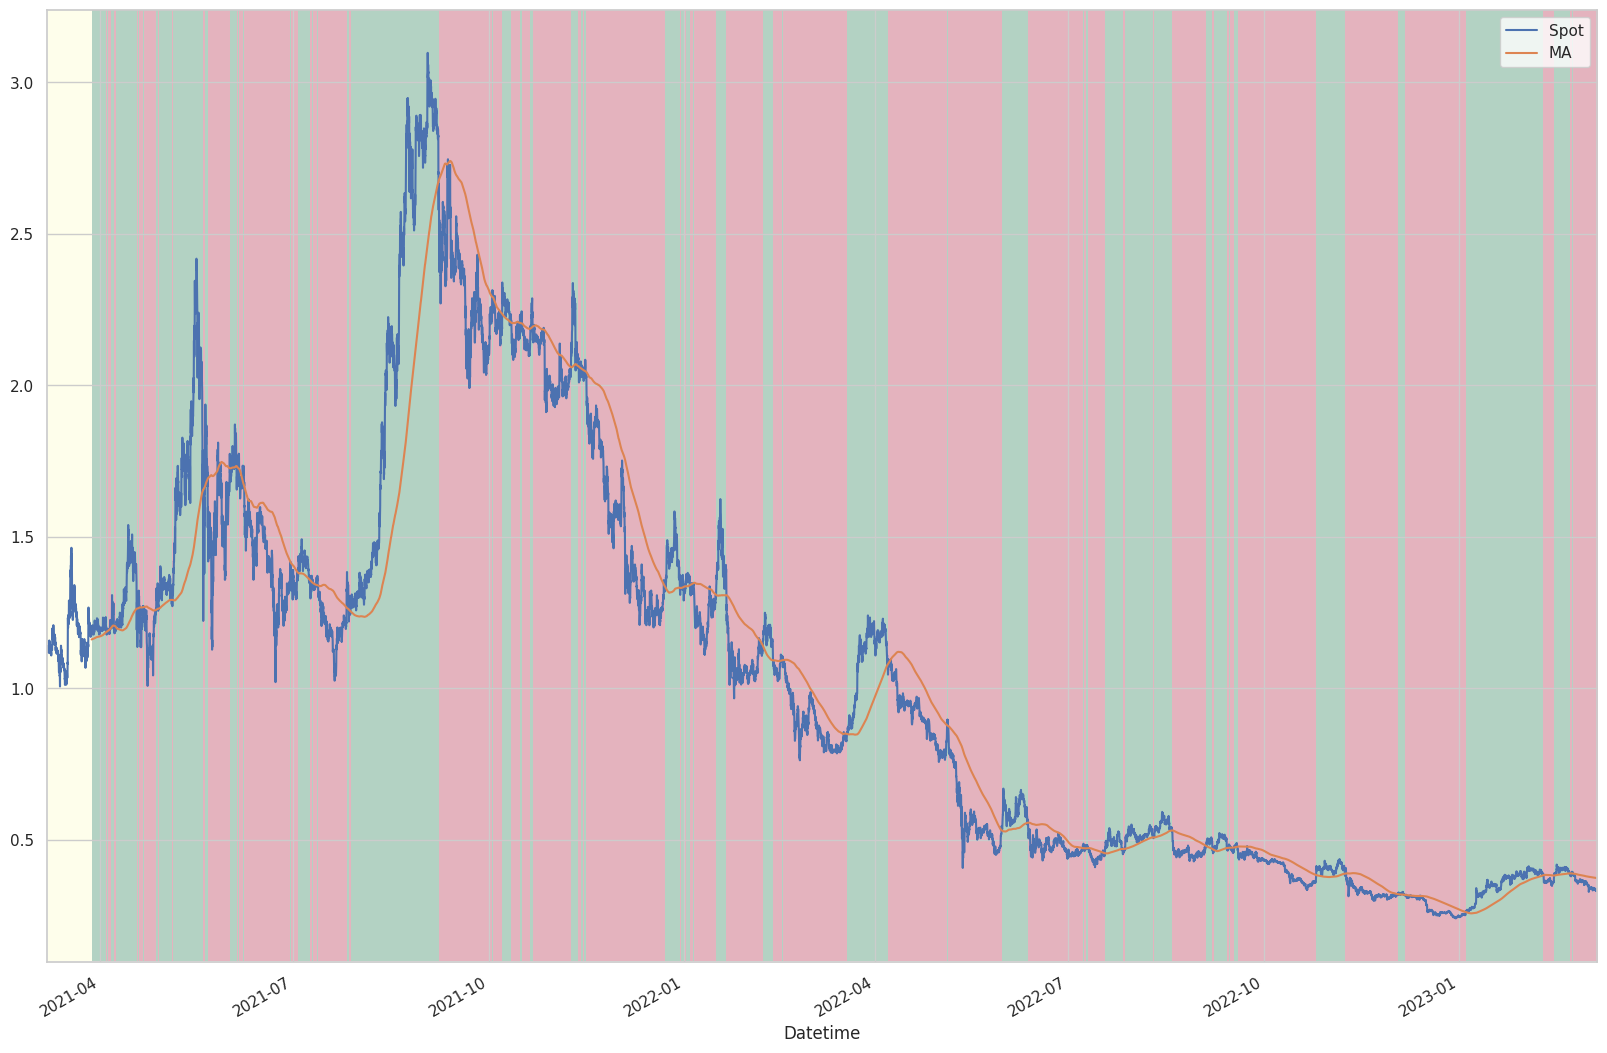

In [2]:
## Imports
import pandas as pd
import matplotlib as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np

## Parameters / Inits
sns.set(style="whitegrid")
sec_in_days = 60*60*24

# define custom color for coloring chart -> green = buy and hold, red = short sell, yellow = no exposure
mycolormap = np.array([plt.cm.RdYlGn(0.0), plt.cm.RdYlGn(0.5), plt.cm.RdYlGn(1.0)])
mycolormap[:, 3] = 0.3
mycolormap = ListedColormap(mycolormap)

# chart spot / MA and color depending on signal
ax = pd.DataFrame({"Spot": spot_px, "MA": ma }).plot(figsize=(20,14));
ax.pcolorfast(                                                  # plots squares in the background
    signal.index.map(lambda dt: dt.timestamp()/sec_in_days),    # x-values of squares = index timestamps
    ax.get_ylim(),                                              # y-values of squares = min/max of chart
    signal.iloc[:-1].values[np.newaxis],                        # color of chart corresponds to signal
    vmin=-1, vmax=1,                                            # color to be taken between -1 and 1
    cmap=mycolormap, alpha=0.3);                                # use my custom colors (somehow alpha does not work?)`


### Long Only

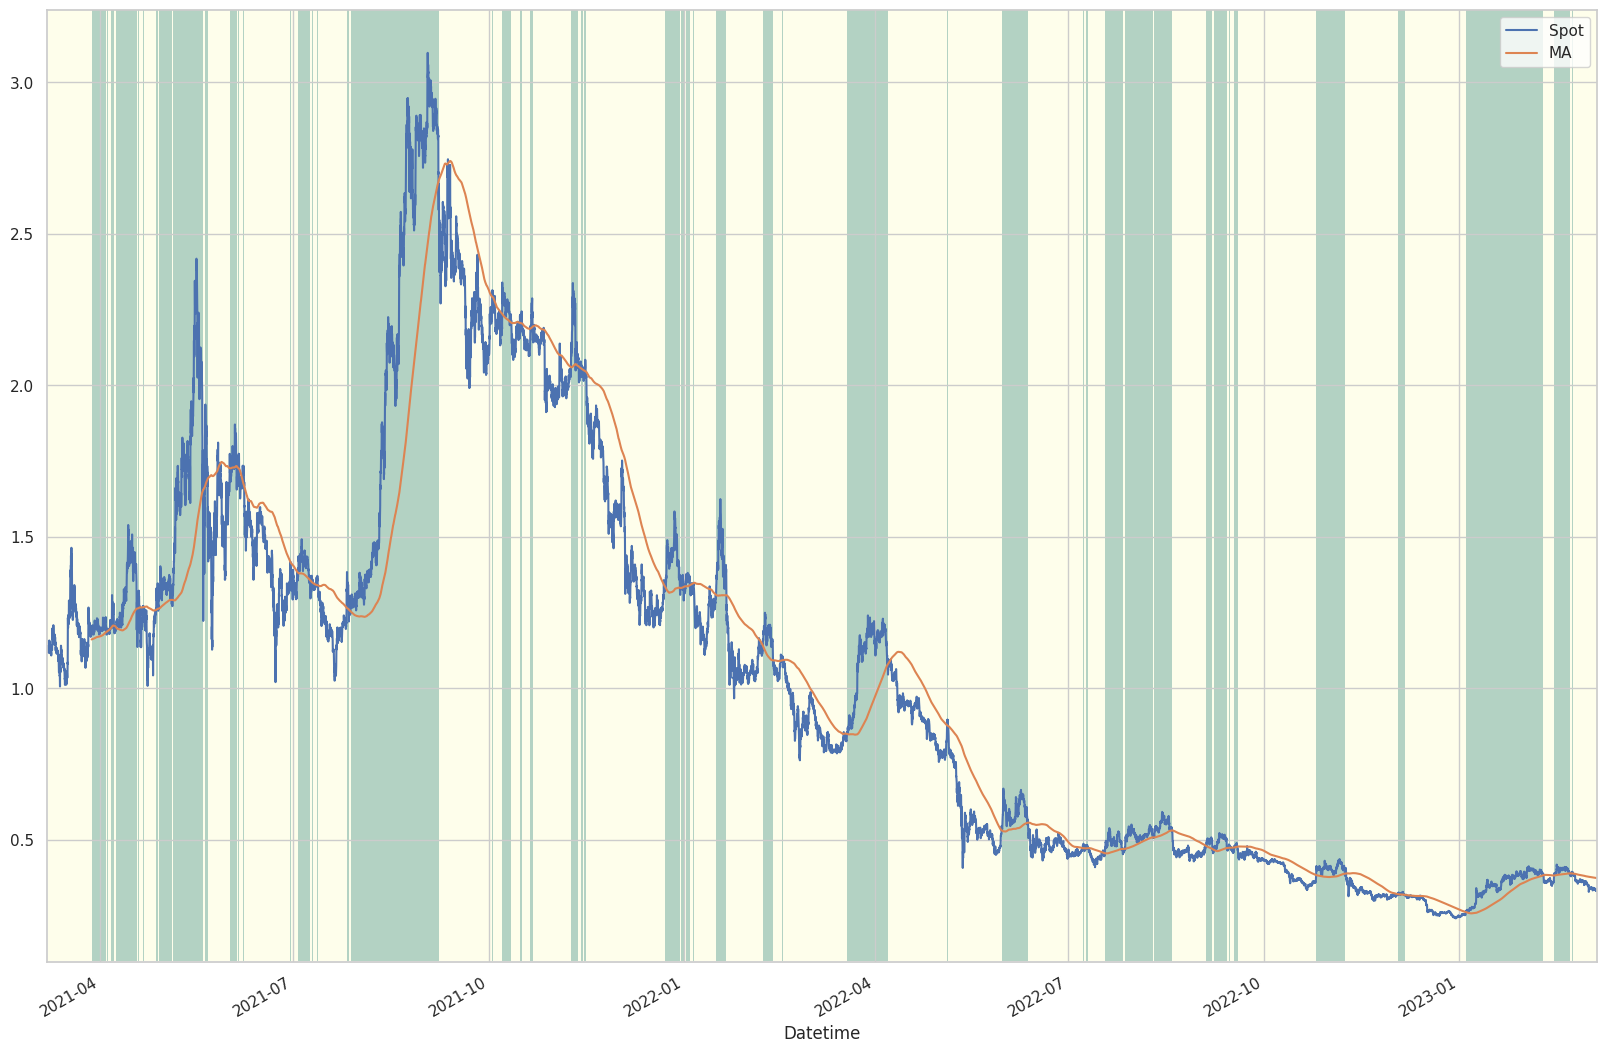

In [3]:
signal_long_only, ma = get_signals.get_signals_from_MA1(spot_px, ma_1_window_size=500, long_only=True)
ax = pd.DataFrame({"Spot": spot_px, "MA": ma }).plot(figsize=(20,14));
ax.pcolorfast(
    signal_long_only.index.map(lambda dt: dt.timestamp()/sec_in_days),
    ax.get_ylim(),
    signal_long_only.iloc[:-1].values[np.newaxis],
    vmin=-1, vmax=1,
    cmap=mycolormap, alpha=0.3);

## Calculate Performance
`return = product of ( 1 + signal * percentage change of return )`
    
note that the signal defined at the beginning of the first time period is only
being measured by the performance at the end of the first period and the last
signal can not be evaluated anymore.

### Long and Short

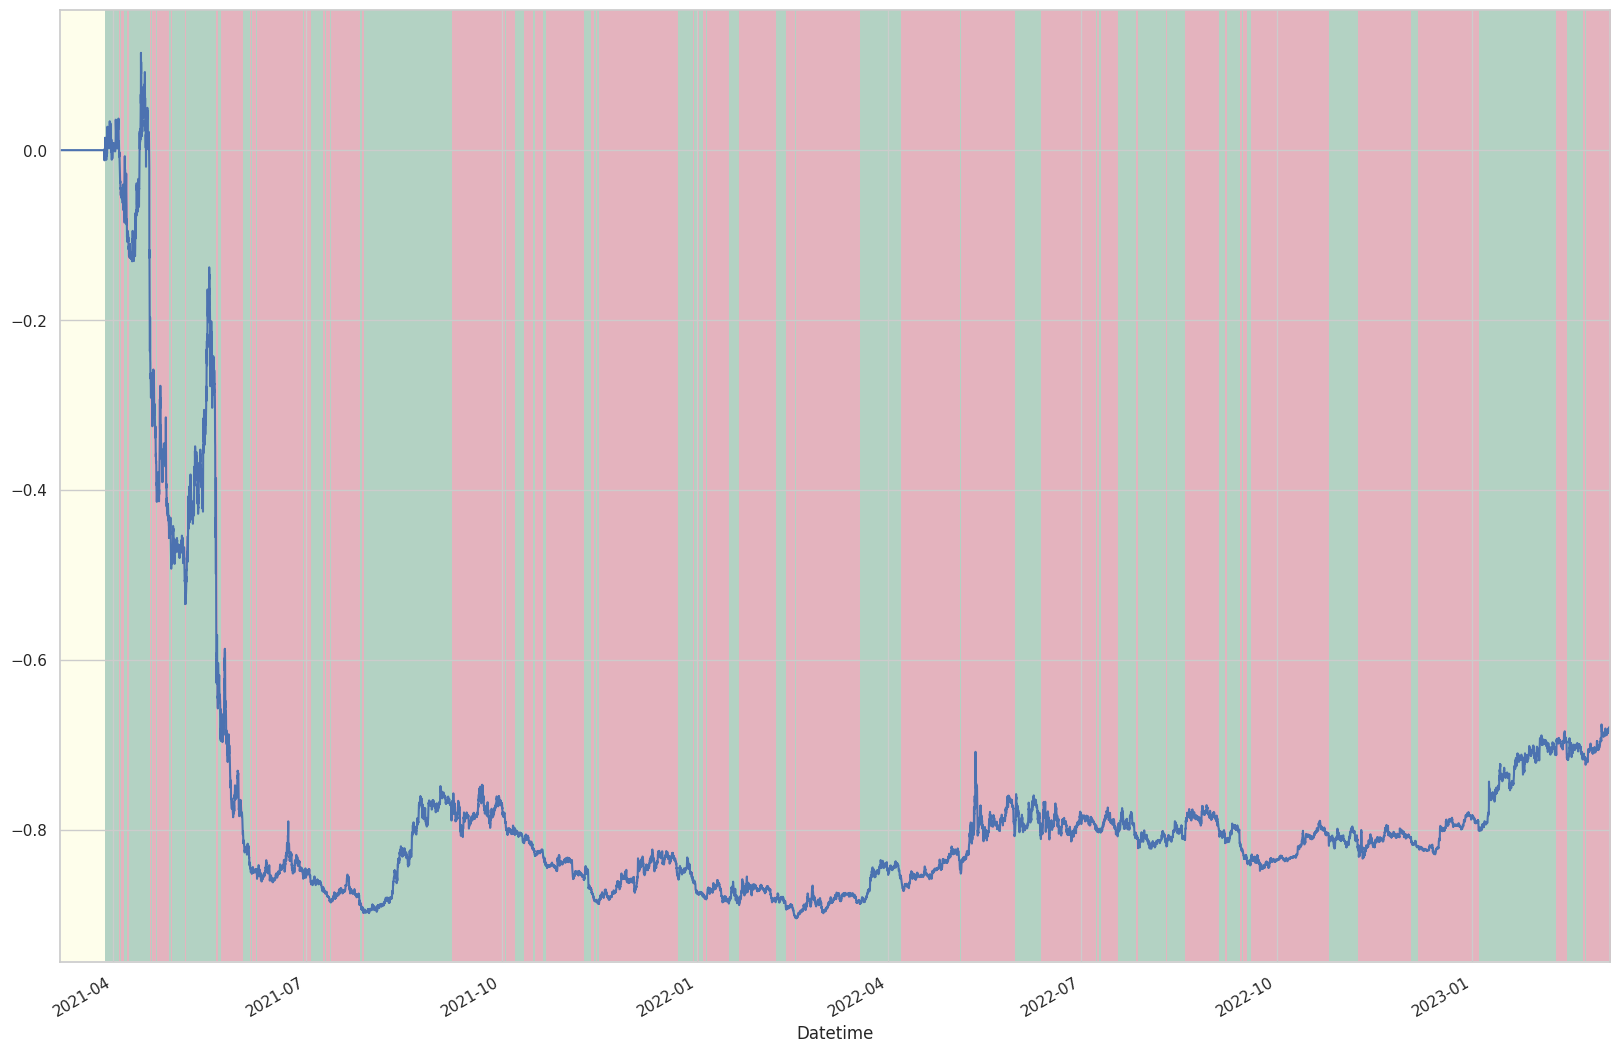

In [4]:
total_return = ( 1.0 + signal[:-1].values * spot_px.pct_change()[1:] ).prod() - 1.0

ax = ( ( 1.0 + signal[:-1].values * spot_px.pct_change()[1:] ).cumprod() - 1.0 ).plot(figsize=(20,14));
ax.pcolorfast(
    signal.index.map(lambda dt: dt.timestamp()/sec_in_days),
    ax.get_ylim(),
    signal.iloc[:-1].values[np.newaxis],
    vmin=-1, vmax=1,
    cmap=mycolormap, alpha=0.3);

### Long Only

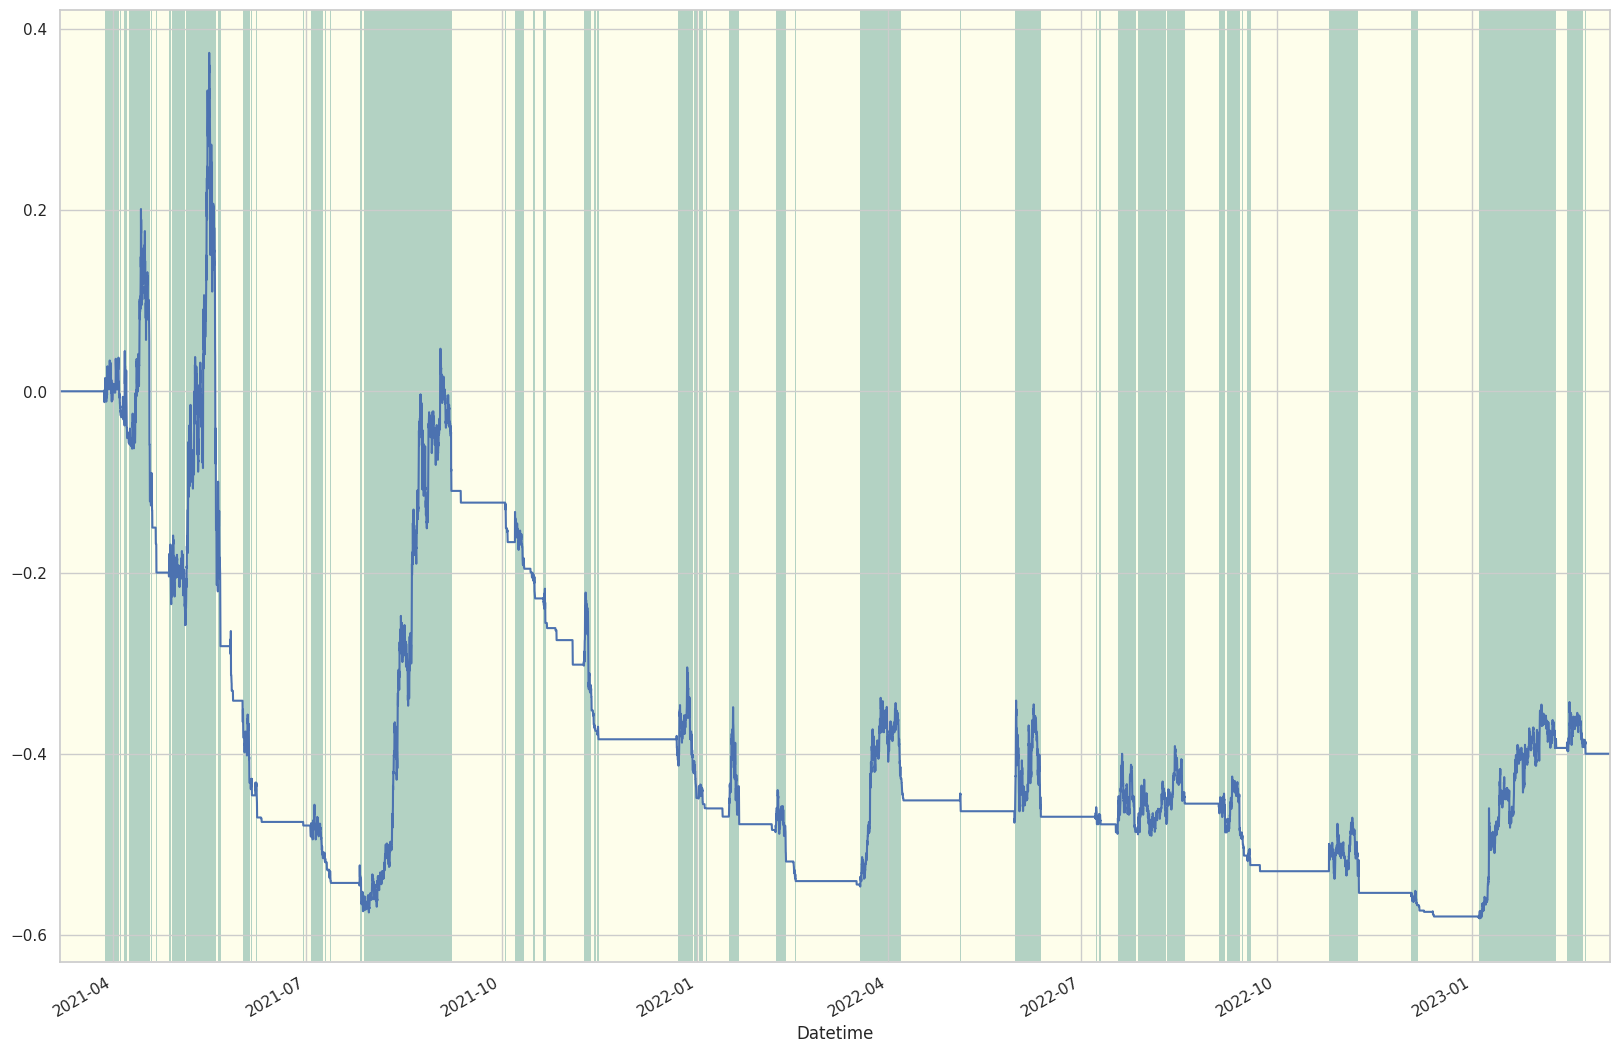

In [5]:
total_return = ( 1.0 + signal_long_only[:-1].values * spot_px.pct_change()[1:] ).prod() - 1.0

ax = ( ( 1.0 + signal_long_only[:-1].values * spot_px.pct_change()[1:] ).cumprod() - 1.0 ).plot(figsize=(20,14));
ax.pcolorfast(
    signal_long_only.index.map(lambda dt: dt.timestamp()/sec_in_days),
    ax.get_ylim(),
    signal_long_only.iloc[:-1].values[np.newaxis],
    vmin=-1, vmax=1,
    cmap=mycolormap, alpha=0.3);